## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 3. Математика для нейронных сетей. Часть II 

### 1. Что вас ждёт в этом модуле?

⛏ Добро пожаловать во второй модуль, посвящённый математике в нейронных сетях.
Мы продолжим изучать нейронные сети и перейдём от простого нейрона к более сложным конструкциям — **нейронным слоям и сетям.**

### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- что такое линейный слой нейронов;

- как вычисляются градиенты методом обратного распространения ошибки;

- зачем нужны функции активации;

- в чём преимущества различных оптимизаторов, и какая математика за ними стоит.

### ВЫ НАУЧИТЕСЬ:

- писать линейный слой с функциями активации, используя NumPy;

- писать полноценную нейросеть с помощью NumPy;

- понимать, как перейти от NumPy к более верхнеуровневому PyTorch.

В конце данного модуля вы решите задачу классификации с помощью тех знаний, которые приобрели за два модуля по математике.

### МАТЕРИАЛЫ МОДУЛЯ ПОДГОТОВИЛИ:

	
ГРИГОРИЙ АЛЕКСЕЕНКО

Ведущий разработчик отдела систем компьютерного зрения, Axxonsoft

### 2. Линейный слой

### ПЕРЕХОД К ЛИНЕЙНОМУ СЛОЮ

⛏ В конце предыдущего модуля мы получили один нейрон, который успешно решает некоторые задачи, однако хочется перейти к чему-то более сложному.

- Как усложнить модель?

Можно сделать так, чтобы у неё было несколько входов и несколько выходов, а также добавить туда ещё несколько нейронов, выполняющих такие же функции.

**Несколько нейронов, производящих свои вычисления параллельно, называют слоем.**

Нейросеть может иметь сколько угодно нейронов и слоёв, что повышает её способность решать задачи, но также усложняет вычисления и делает сеть менее производительной.

Давайте реализуем свой собственный линейный или полносвязный слой.

В момент его создания нужно указать, какую размерность он должен получить на входе и отдать на выходе, — соответственно, от этого будет зависеть и количество нейронов в нём.

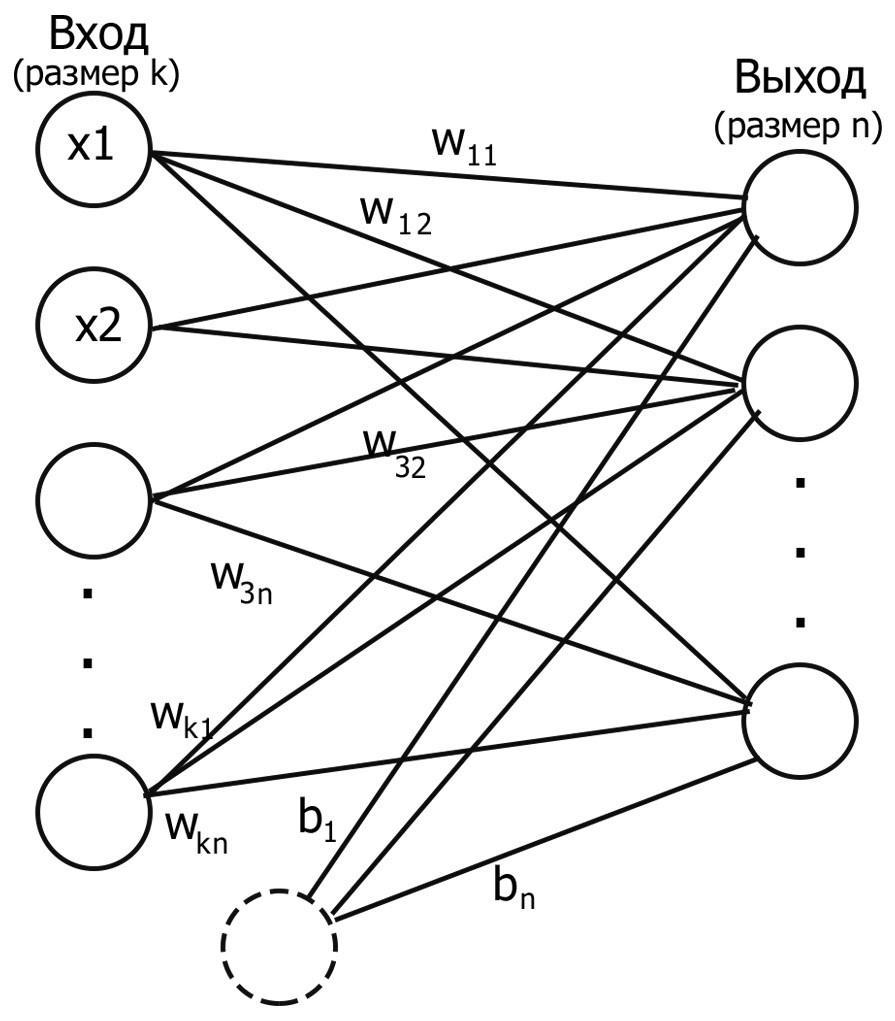

Получается, данный слой имеет  весов  плюс ещё  для параметров сдвига .

### Задание 2.1

В современных нейронных сетях полносвязные слои используются редко — максимум один на всю сеть, в конце. Как думаете, почему так происходит?  
Ответ:
- A Учитывают только значения входов, не используют порядок этих значений
- B Они строго завязаны на входной размер, нельзя менять параметры входных данных на ходу
- C Предпочитают использовать специализированные для задач слои
- D Долго работает, нельзя хорошо распараллелить

### ЛИНЕЙНЫЙ СЛОЙ В NUMPY

СКАЧАТЬ НОУТБУК: https://github.com/luhakv/cv_engr/blob/master/module3_screencast1.ipynb

Функции, которые нам понадобятся:

- _init_ для инициализации слоя соответственно его размерам;
- forward для вычисления выходного значения на этом слое;
- backward для вычисления градиента;
-clear_grad для обнуления градиента после обновления весов, так как теперь мы всё храним внутри этого класса.  

Также особое внимание мы с вами уделим функции backward_as_last_layer.

Давайте теперь создадим свою нейронную сеть из этих блоков.

В конструктор мы передадим структуру: массив с описанием размеров входных, выходных и внутренних (скрытых) слоёв.

Процесс обучения будет проходить так:

1) Прогоняем сэмпл из обучающей выборки «вперёд».

2) Сохраняем значения на каждом слое для последующего их применения в обратном проходе.

3) Производим backward (вы можете обратить внимание, что он идёт с последних слоёв к первым).

4) Считаем градиенты для обновления весов и после итерации обновления повторяем весь процесс снова.

Для визуализации прогресса мы используем библиотеку **tqdm**, которая в реальном времени будет нам показывать, на какой мы итерации, сколько ещё осталось итераций и времени, а также примерную скорость обучения.

### Задание 2.2

Почему функция потерь не достигает нуля, хоть и стремится к нему?  
Ответ: Данные неидеальны, их невозможно аппроксимировать с абсолютной точностью 

### Задание 2.3

Сколько слоёв получится в сети, если в structure задано n чисел?  
Ответ: n-1 слоёв 

### 3. Обратное распространение ошибки

### ГРАФ ВЫЧИСЛЕНИЙ

⛏ Отдельного упоминания заслуживает обратный проход с вычислением производных. Почему он идёт с конца? Почему для вычисления производных на слое  мы используем производные со слоя ? Здесь применяется механизм обратного распространения ошибки, который невозможен без понятия графа вычислений.

**Граф вычислений** — это способ представления сложной операции вычисления посредством её разбиения на более простые и понятные.

Рассмотрим пример на картинке:

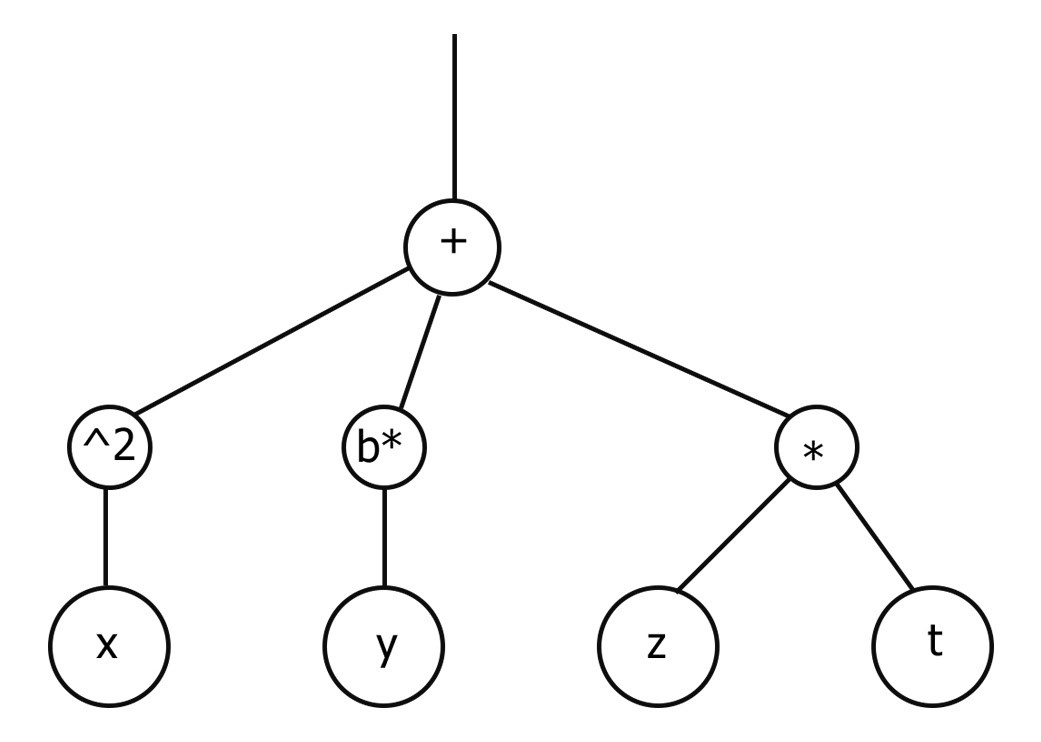

Этот граф отражает равенство:

Здесь четыре входа (, , , ) и один выход, в котором все проделанные операции суммируются.

Например, в нашей нейросети есть два скрытых слоя. Функционально мы можем это записать как композицию функций  и :

где  есть функция, эквивалентная применению слоя. Мы можем представить её в качестве графа вычислений, где на вход подаётся . Затем к нему мы применяем , а потом на вход к  мы подаём уже результат применения .

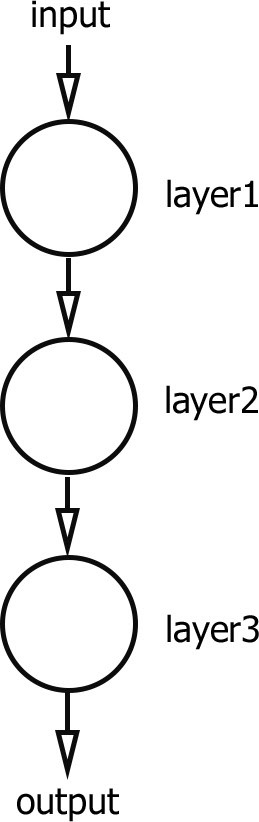

Такие структуры выглядят естественно и просто и даже могут казаться ненужными, но если мы усложним структуру сети, понять её формульный вид будет сложнее, нежели граф вычислений.

### Задание 3.1

Зачем нужен граф вычислений?  
Ответ: Он отражает порядок и связь слоёв 


### ОБРАТНОЕ РАСПРОСТРАНЕНИЕ ОШИБКИ

⛏ Итак, мы хотим узнать производную от loss-функции по весам первого слоя.

Мы можем записать всё как есть:

Затем мы можем посчитать производную — напрямую или с помощью цепного правила:

Это оказывается очень практично в нашем случае, так как для обновления весов нам нужно знать производные по всем весам, а при проходе таким образом мы вычислим их все по очереди.

Вся схема, где мы вычисляем производные с конца, называется **механизмом обратного распространения ошибки**, или **backpropagation.**

### Задание 3.2
Зачем в коде предыдущего скринкаста функция forward возвращает значения со всех слоёв?  
Ответ: Эти значения нужны для вычисления производных верно

### ПРИМЕР BACKPROPAGATION

Чтобы лучше понять принцип работы backpropagation, давайте разберём пример:

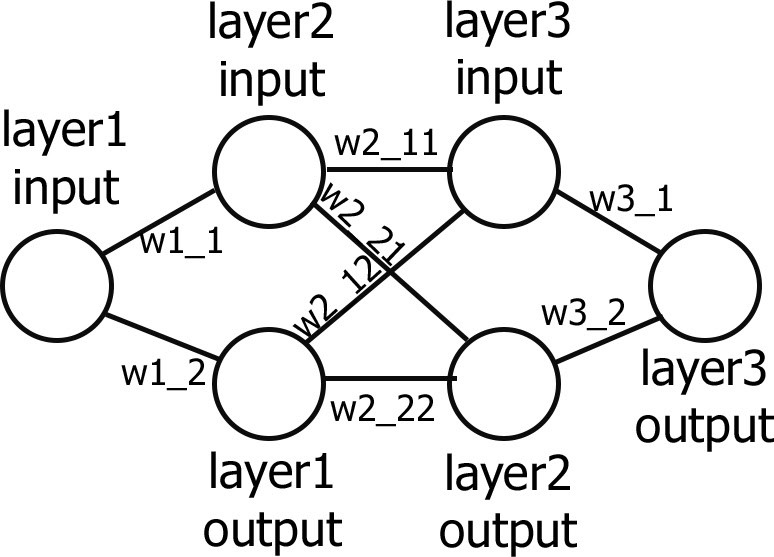

Мы имеем три линейных слоя:

- Первый с одним входом  и двумя выходами.
- Второй принимает на вход выход первого и выдаёт два числа.
- Третий принимает на вход выход второго и выдаёт одно число.  

Запишем полностью зависимость loss от , , , , а матричная запись позволит нам делать наши вычисления компактнее:

Давайте возьмём частную производную по :

Запомним эту производную и дальше будем на неё опираться.

Посчитаем производную по  в общем виде с помощью цепного правила:

Рассмотрим в общем виде производную от , , . Мы видим, что в этих производных есть очень похожие части, кроме последней производной  по . Поэтому производную по весу  мы можем посчитать с помощью производных .

Именно поэтому производную на последнем слое мы отделили от остальных, а производную для остальных слоёв мы можем вычислять итеративно, начиная с конца, при этом используя предыдущие результаты.

### 4. Функции активации

### КОГДА ЛИНЕЙНОЙ МОДЕЛИ НЕДОСТАТОЧНО

⛏ Теперь усложним задачу: сгенерируем данные, похожие на логический .

СКАЧАТЬ НОУТБУК:  https://github.com/luhakv/cv_engr/blob/master/module3_screencast2.ipynb

 и  будут числа от -1 до 1, а искомый ответ будет 0 или 1 в зависимости от того, где находится точка , или от знака произведения . Теперь это задача классификации. 

Как мы можем понять, логистическая регрессия с данной задачей уже не справится — здесь нет разделяющей прямой.

Если мы попробуем решить её с помощью нашей сети, мы увидим, что наша модель не будет справляться, сколько слоёв и нейронов в неё ни добавляй. С чем это связано? На самом деле любое количество линейных слоёв подряд можно привести к одному линейному слою с коэффициентами, которые являются композицией предыдущих. Но как нам решить задачу? На помощь приходят функции активации.

### Задание 4.1

Почему с BCE Loss ничего не получилось?  
Ответ:  Числа, передаваемые в функцию потерь, ничем не ограничены, а BCE ожидает числа в диапазоне  [0,1]


### Задание 4.2

Какую точность можно ожидать от линейной модели на XOR-выборке?  
Ответ: Примерно до 63% верно

### ФУНКЦИИ АКТИВАЦИИ


Функции активации добавят в нашу сеть нелинейности. Они так называются, потому что по сути они активируются на определённые сигналы, например функция ReLU.

Часто применяемая в нейронных сетях, функция ReLU активируется, когда ей приходит положительный сигнал, а сигнал со знаком минус она приравнивает к нулю.

Функции активации ставят после слоёв, тем самым усложняя получаемый результат: теперь вместо линейных преобразований и разделяющих прямых (плоскостей) мы получаем экспоненциальные, логарифмические, ступенчатые и т. д.

Давайте модифицируем код нашей сети и добавим каждому слою функцию активации, например сигмоиду.

Теперь за  будет обозначаться выход со слоя после применения активационной функции, а за  — выход только слоя.


Это усложняет наши вычисления для обратного распространения, но зато прибавляет вычислительной точности.

Давайте рассмотрим, как теперь выглядит производная с учётом того, что теперь есть  и :

В целом стало больше множителей, но сильно нам это жизнь не усложнило. В следующем блоке модуля мы применим это на практике.

### ФУНКЦИЯ АКТИВАЦИИ SOFTMAX

Вы уже рассмотрели множество функций активации в других модулях, но есть ещё одна, которая специфична для случая многоклассовой классификации, — SoftMax.

Допустим, сеть возвращает  чисел. Каждое из них отвечает за то, что перед нами конкретный класс. Эти числа могут быть любыми: отрицательными, положительными, большими и маленькими. Наша функция поможет интерпретировать их как вероятности для каждого класса, более того — она сделает их согласованными, то есть сумма всех вероятностей будет равна единице (для этого мы делим получившееся значение на сумму всех значений для  чисел).



### ФУНКЦИИ АКТИВАЦИИ В NUMPY

СКАЧАТЬ НОУТБУК: https://github.com/luhakv/cv_engr/blob/master/module3_screencast3.ipynb

Теперь мы знаем, что для решения нелинейных задач нужны функции активации.

Модифицируем класс линейного слоя так, чтобы он работал с учётом функций активации и их производных. Изменениям подвергнутся функции forward, backward и __init__, где мы добавляем каждому слою функцию активации. 

Мы применяем то, что у нас получилось, и обучаем сеть с использованием уже знакомых нам функций потерь.

Мы видим, что с использованием функций активации наша модель легко справляется с нелинейными данными.

### Задание 4.4

Почему последний эксперимент с регрессией на линейных данных не получился?  
Ответ: На выходе сети стояла сигмоида — она ограничила выход сети до диапазона [0,1] 

### ПРОБЛЕМА ИНИЦИАЛИЗАЦИИ

СКАЧАТЬ НОУТБУК: https://github.com/luhakv/cv_engr/blob/master/module3_screencast4.ipynb

При больших значениях  сигмоида ведёт себя, как линейная функция. Это плохо, так как нелинейность нам нужна. Если веса большие, то значения  находятся в зонах насыщения — там, где уже не такая большая разница между  и , и функция почти линейна.

Чтобы этого избежать, предлагается Xavier-распределение весов:

- веса генерируются в соответствии с равномерным распределением в диапазоне ;
- затем каждый вес мы умножаем на такое значение  

### Задание 4.5

Чем поможет уменьшение дисперсии в начальных весах?  
Ответ: Веса не будут сильно отличаться в начале, а значит не будут сильно отличаться и градиенты, что поможет модели равномернее обучиться

На самом деле вариант с random seed не так уж плох: бывают ситуации, когда при одном случайном выборе всё плохо, а при другом модель показывает хорошие результаты.

### Задание 4.6

Что произойдёт, если мы инициализируем все веса нулём?  
Ответ: Это приведёт к тому, что результат всегда будет один, и сеть не будет обучаться 

### 5. Оптимизаторы

⛏ Давайте представим, что у нас миллион сэмплов в обучающей выборке, и проход по этим данным занимает большое время. Что мы можем сделать, чтобы упростить себе жизнь и не проходить всю выборку раз за разом, чтобы обновить веса нашей сети?

### СТОХАСТИЧЕСКИЙ ГРАДИЕНТНЫЙ СПУСК

Можно взять случайную подвыборку, пройти по ней, обновить веса и продолжать этот процесс дальше.

Описанный механизм называется оптимизатором **SGD — Stochastic Gradient Descent**. Если быть точнее, SGD — это когда мы обновляем вес после каждого сэпмла.

Оптимизатор с использованием подвыборок называется **Mini-batch SGD.**

Подвыборка называется **минибатч (от англ. "batch" — «партия»).**

SGD позволяет нам немного ускорить приближение к желаемому результату, разбивая один большой шаг градиентного спуска по всей выборке на некоторое количество маленьких.

_Важное замечание:_ сумма этих маленьких шагов совсем необязательно равна одному большому, так как мы в каждой точке после обновления весов ищем градиент заново и по куску выборки. Поэтому шаги дадут одинаковую сумму только в том случае, если в нашей выборке одинаковые сэмплы и поверхность потерь имеет линейный вид, что совсем не соответствует действительности.

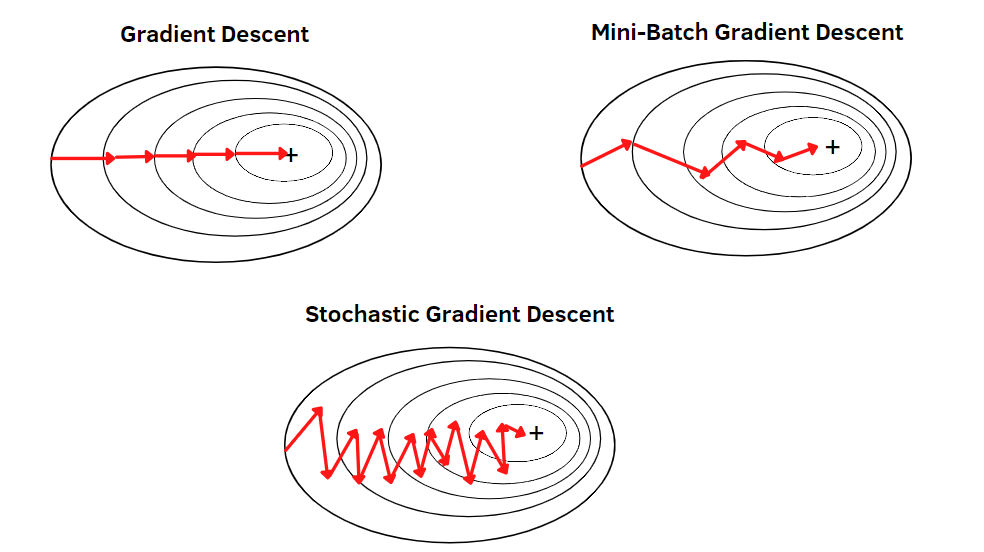

### ПАРАМЕТР MOMENTUM

**Что можно оптимизировать ещё?**

Допустим, мы сделали несколько шагов и заметили, что движемся примерно в одном направлении. Почему бы нам не запомнить это направление как правильное и не добавлять вектор этого направления к градиенту, раз мы всё равно движемся в эту сторону?

Здесь часто приводят аналогию с катящимся шаром: при движении шар набирает инерцию, и, если его ткнуть перпендикулярно движению, он покатится по диагонали, суммируя свою накопленную инерцию с тем импульсом, который ему придали толчком.

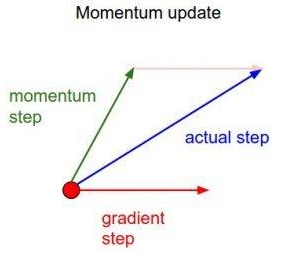

Этот параметр называется **Momentum** и принимает значение от 0 до 1 — множитель, на который домножается инерция.

Получается, что при  мы получаем тот же самый SGD, а при  мы «катимся», учитывая опыт предыдущих итераций так же, как и текущий шаг.

Этот способ помогает ускорить вычисления и не застрять на плато, где возле нашего текущего положения нет новых минимумов.

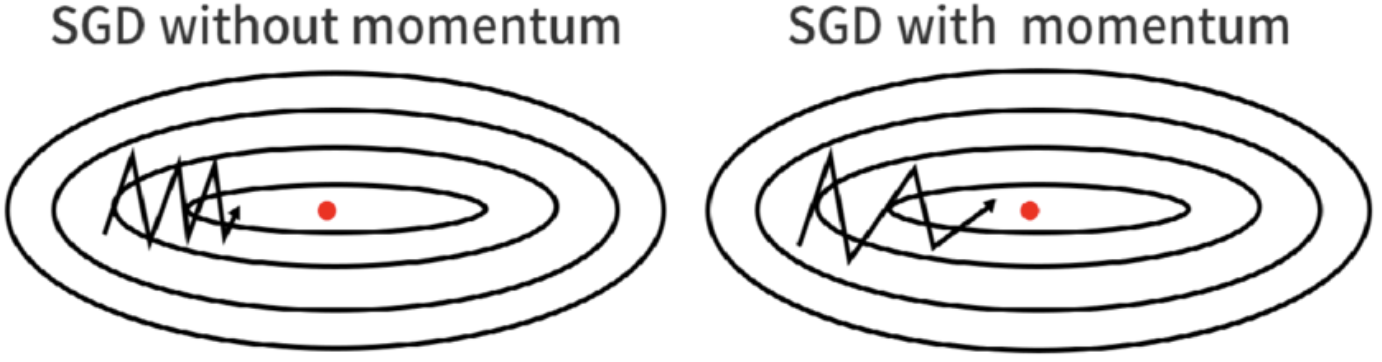

### ОПТИМИЗАТОР ADAGRAD

⛏ Ещё один хитрый способ реализован в оптимизаторе **AdaGrad — Adaptive Gradient.**

Нередко случается так, что некоторые параметры сети обновляются чаще других или колеблются — вес то увеличивается, то уменьшается. Так происходит потому, что эти параметры отвечают за какой-то нетипичный признак для выборки, например при классификации машина/шум параметр завязался на цвет, что не является основным критерием того, машина ли перед нами. Нам важнее увидеть форму, найти колёса, стёкла или что-то в этом роде.

ImgПочему бы не определить для каждого параметра то, как часто и сильно он обновляется, и немного приглушить эти частые обновления?

Для этого мы можем для каждого нейрона посчитать сумму его обновлений по модулю или его квадрат и затем разделить шаг обновления весов на эту сумму. Получается что-то вроде своего learning rate для каждого нейрона.

SGD

ADAGRAD

На самом деле различных ухищрений много, и мы с вами обсудили только самые основные.

Существует много различных оптимизаторов, и все они до сих пор используются,  так как поверхности, формируемые функцией потерь, всегда разные, и в разных ситуациях один из оптимизаторов показывает себя лучше других. Поэтому важно понимать их плюсы и минусы: например, AdaGrad может накопить много обновлений, и это может привести к «параличу» алгоритма, а использование Momentum может не дать свернуть в сторону более эффективного локального минимума в нужный момент.

А вот сравнение работы оптимизаторов в конкретном случае для примера:

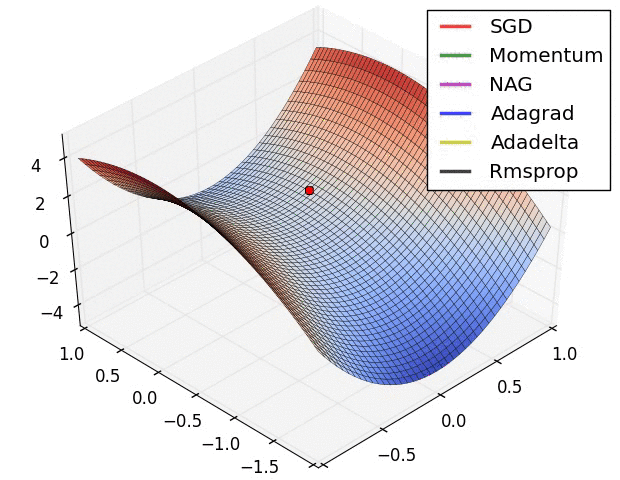

### Задание 5.1

Ранее мы уже использовали подобие SGD — обновляли веса после каждого сэмпла, но мы об этом вам не говорили. Сопоставьте примеры кода и оптимизаторы:

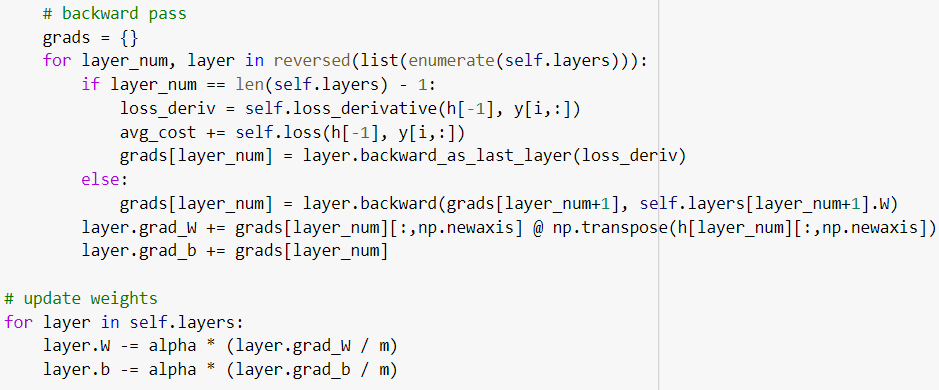
Gradient Descent

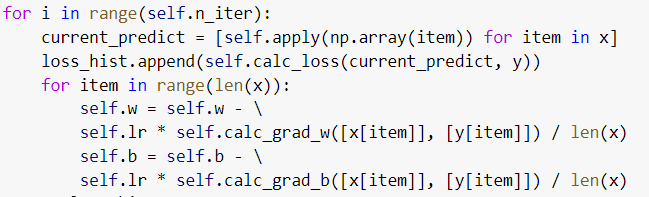
SGD

Примечание. А вы это заметили сразу или узнали только сейчас? На самом деле, для более честного SGD сэмплы нужно выбирать случайным образом, а мы брали их всегда в одном порядке.

### 6. Закрепление знаний

ДЛЯ ЗАКРЕПЛЕНИЯ ТЕОРЕТИЧЕСКОГО МАТЕРИАЛА ДАЙТЕ ОТВЕТЫ НА ВОПРОСЫ НИЖЕ

### Задание 6.1

Выберите те оптимизаторы, при которых перед обновлением весов обрабатывается больше одного сэмпла:
- Gradient Descent
- AdaGrad
- Mini Batch SGD


### Задание 6.2

Сколько всего весов у линейного слоя? Используйте  и  как выходной и входной размеры слоя.
- n*(k+1)

### Задание 6.3

Чем плоха пороговая функция активации нейрона?
Возможно несколько верных вариантов ответа.
- Принимает только два значения
- Имеет точки, где нет производной
- Имеет узкий спектр применения

### Задание 6.4

В чём основное отличие линейных моделей от нейронных сетей?
- Нейронные сети могут справиться с более сложными данными за счёт нелинейности 

### Задание 6.5

Вес одного нейрона часто и сильно колеблется — что это значит?
- Этот нейрон отвечает за нетипичный признак в выборке 

### Задание 6.7

Что нужно поменять в сети бинарной классификации, чтобы она могла разделять больше классов?
Возможно несколько верных вариантов ответа.

- Функцию потерь
- Размер выходного слоя
- Функцию активации на последнем слое

### Задание 6.8

Что нужно поменять в сети многоклассовой классификации, чтобы она могла решить задачу бинарной классификации?
Примечание: Функции потерь и активации для многоклассовой классификации подходят и для бинарной, например BCE — это формула CE для двух классов, а Softmax — это как многомерная сигмоида.
- Размер выходного слоя

### Задание 6.9

Зачем мы нормализуем данные для нейронных сетей?
- Мы облегчаем задачу и переводим данные в более удобный диапазон 

### 7. Финальное задание

⛏ Теперь, когда мы реализовали на NumPy все компоненты нейросети — линейный слой, саму модель, функции активации и цикл обучения — мы готовы собрать всё это воедино и применить на реальных данных.
В качестве итогового задания сразу по двум модулям вы решите задачу многоклассовой классификации на датасете Digits.
⚡ Чтобы задание считалось успешно выполненным, accuracy на тестовой выборке должна быть >=0.8.

Для выполнения домашнего задания скачайте ноутбук по ссылке ниже. Откройте его в Jupyter Notebook или Google Colab.

СКАЧАТЬ НОУТБУК: https://clck.ru/XLAeU

### 8. Привет, PyTorch!

⛏ Всё, что мы с вами реализовали за два модуля математике, уже есть в библиотеках для глубокого обучения TensorFlow, PyTorch и других.

У них разный синтаксис и немного отличается реализация, например в PyTorch граф вычислений динамический, и поэтому в нём можно изменять данные по ходу работы с ними, а в TensorFlow граф статический, что лишает возможности менять данные на ходу, но даёт прирост в скорости при использовании в качестве конечного продукта, когда все эксперименты уже проведены.

Давайте проведём аналогию между нашей рукописной нейросетью и нейросетью, написанной на PyTorch.

СКАЧАТЬ НОУТБУК: https://github.com/luhakv/cv_engr/blob/master/module3_screencast5.ipynb

К счастью, вам не придётся писать свои модели и их обучение исключительно на NumPy. PyTorch — готовая верхнеуровневая библиотека для реализации нейронных сетей. В PyTorch единицей хранения данных является тензор.

**Тензор** — это тот же самый массив, с которыми мы работали в NumPy, но в него добавлены дополнительные функции, которые упрощают вычисления для нейронных сетей. 

Из NumPy-массива можно перейти в PyTorch-тензор с помощью операции torch.tensor().

Сопоставим несколько операций на NumPy и PyTorch:

**Массив случайных чисел** - np.random.rand() - torch.rand()  
**Массив единиц** -	np.ones() - torch.ones()  
**Массив нулей** - np.zeros() - torch.zeros()  
**Умножение матриц** - np.dot() - torch.matmul()

Используя PyTorch, вы можете написать уже знакомую вам нейросеть в несколько строк:



In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Также с помощью PyTorch можно легко, в несколько строк, запустить обучение и протестировать модель.

### Задание 8.1

Что делает nn.Flatten()?
- Перед применением нейронной сети делает вектор из входной n-мерной матрицы 

### Задание 8.2

Давайте поэкспериментируем с оптимизатором для решения задачи. Меняйте только оптимизатор. С каким получилась большая точность на тесте?
Важно: для воспроизводимости результатов меняйте только оптимизатор и перезапускайте весь ноутбук с каждым новым оптимизатором.
- torch.optim.Adam 

Верно. Adam считается одним из самых эффективных и часто используемых оптимизаторов. Он сочетает в себе идеи и исправления ошибок всех остальных из присутствующих в вариантах оптимизаторов. Но не забывайте, что не всегда он показывает лучший результат — всё зависит от случая.

### Задание 8.3

Почему в данной задаче нас устраивает точность 50%? Какая точность будет соответствовать случайному выбору? 
- 10%, так как классов 10 

### Задание 8.4

Какая сеть будет решать задачи точнее?
- Все нижеперечисленные функции будут решать задачи одинаково, так как комбинация линейных слоёв без функций активации между ними — всё равно что один линейный слой

In [ ]:
nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Linear(512, 512),
            nn.Linear(512, 10)
        )

In [ ]:
nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Linear(512, 512),
            nn.Linear(512, 512),
nn.Linear(512, 10)
        )

In [ ]:
nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Linear(512, 10)
        )

### НЕЙРОСЕТЬ НА PYTORCH

⛏ Вернёмся к нашей задаче многоклассовой классификации. Однако теперь мы реализуем нашу нейросеть на PyTorch.

Для выполнения задания скачайте ноутбук по ссылке ниже. Откройте его в Jupyter Notebook или Google Colab.

В этом задании вам придётся во многом опираться на ноутбук под видео, в котором мы знакомились с основными элементами PyTorch.

СКАЧАТЬ НОУТБУК: https://clck.ru/XLBjv  
⚡ Чтобы задание считалось успешно выполненным, accuracy на тестовой выборке должна быть >=0.8.

### 9. Итоги


⛏ Вот и подошли к концу два модуля, посвящённые математике в нейросетях.  

→ Мы с вами прошли большой путь от простых линейных моделей до сложных нейросетей со своими нелинейностями, подборами весов и другими ухищрениями.  
→ Если вы встретили какие-то темы, которые уже были рассмотрены ранее, это говорит о том, что они настолько важны, что достойны того, чтобы вы их повторили и держали в голове.  

Стоит отметить, что была рассмотрена только основная, малая часть того, что используется в глубоком обучении, а это значит, что у вас ещё многое впереди.  

⭐ Спасибо вам за проделанную работу! Полученные знания точно пригодятся вам в дальнейшем обучении и работе. Успехов!